In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from MuC import MuC
from MuC import const
from MuC import collider_tools as col
from MuC import detector_tools as det
from MuC import plot_tools as pt
from MuC import xsecs as xs

from DarkNews import Cfourvec as Cfv


# Calculating the neutrino-electron spectra at the MuC

In [84]:
# Neutrino charge radius
rSQRe = 4.1e-33
rSQRmu = 2.4e-33

const.m_W**2/const.invGeV2_to_cm2 * rSQRe / 3
f'{const.m_W/np.sqrt(const.invGeV2_to_cm2):.4e}'

'4.0734e+15'

In [34]:
sim_design = MuC.BINSimulator(design=col.muc_10tev, N_evals = 5e6, save_mem=False, lattice='beam-optics/ring_v06_smoothed.pkl', remove_ring_fraction=0.93)
sim = sim_design.run()

Efficiency of detector acceptance: 3.46e-01
(1618335,) (1618335, 34) (1618335, 34)
Events in detector:  [0. 0. 0. ... 0. 0. 0.] ATTENTION HERE.
Efficiency of detector acceptance: 3.47e-01
(1625722,) (1625722, 34) (1625722, 34)
Events in detector:  [0. 0. 0. ... 0. 0. 0.] ATTENTION HERE.
Efficiency of detector acceptance: 3.46e-01
(1620048,) (1620048, 34) (1620048, 34)
Events in detector:  [0. 0. 0. ... 0. 0. 0.] ATTENTION HERE.
Efficiency of detector acceptance: 3.47e-01
(1623266,) (1623266, 34) (1623266, 34)
Events in detector:  [0. 0. 0. ... 0. 0. 0.] ATTENTION HERE.
Total count: 8.90e+11 events;



In [ ]:
def get_nue_rate(ebins, flux, nuf='numubar', **kwargs):
    de = np.diff(ebins)
    ec = ebins[:-1] + de/2
    return xs.nue_elastic_sigma(Enu=ec, nuf=nuf, **kwargs) * flux

kwargs = {"det_location": [0,0, 500e2], "ebins": np.linspace(0, sim.design['beam_p0'], 50, endpoint=True), "det_radius": [0, 1000], "per_area": False, "new_polarization": 0.2}
ebins_nue, flux_nue = sim.mustorage_sims[0].get_flux_at_generic_location(**kwargs)
ebins_numubar, flux_numubar = sim.mustorage_sims[1].get_flux_at_generic_location(**kwargs)
ebins_nuebar, flux_nuebar = sim.mustorage_sims[2].get_flux_at_generic_location(**kwargs)
ebins_numu, flux_numu = sim.mustorage_sims[3].get_flux_at_generic_location(**kwargs)

# Test the ES spectra

Text(0, 0.5, 'Spectrum')

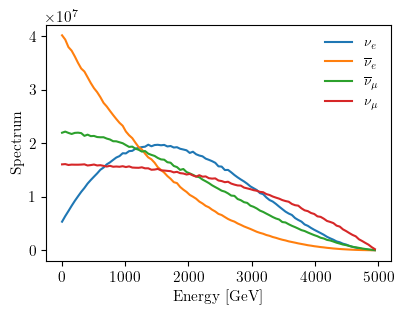

In [87]:
plt.plot(ebins_nue[:-1], flux_nue, label=r'$\nu_e$')
plt.plot(ebins_nuebar[:-1], flux_nuebar, label=r'$\overline{\nu}_e$')

plt.plot(ebins_numubar[:-1], flux_numubar, label=r'$\overline{\nu}_\mu$')
plt.plot(ebins_numu[:-1], flux_numu, label=r'$\nu_\mu$')
np.sum(flux_numubar*np.diff(ebins_numubar)*(ebins_numubar[:-1]+np.diff(ebins_numubar)/2))/np.sum(flux_nue*np.diff(ebins_nue)*(ebins_nue[:-1]+np.diff(ebins_nue)/2))
plt.legend()
plt.xlabel('Energy [GeV]')
plt.ylabel('Spectrum')

# Dependence of $\sigma(E_\nu)$ on $\sin^2(\theta_W)$

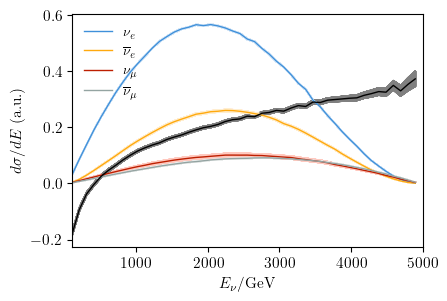

In [ ]:
Enu = ebins_nue
fig, ax = pt.std_fig()

Ldet = 1e2 # 1 m
norm = const.NAvo * Ldet * 2.6 / 2 * (5 * 1e7)
lighten = 0.75

s2w_central = 0.2324
s2w_1sigma = 0.0083/3
sinvalues = np.linspace(s2w_central-3*s2w_1sigma, s2w_central+3*s2w_1sigma, 500)

Te_min = 100
Te_max = 5e3

for i, s2w in enumerate(sinvalues):
    kwargs = {"Te_min": Te_min, "Te_max": Te_max, "s2w": s2w}
    Rmu = get_nue_rate(Enu, flux_numu, nuf='numu', **kwargs)*norm
    Re = get_nue_rate(Enu, flux_nue, nuf='nue', **kwargs)*norm
    Rmub = get_nue_rate(Enu, flux_numubar, nuf='numubar', **kwargs)*norm
    Reb = get_nue_rate(Enu, flux_nuebar, nuf='nuebar', **kwargs)*norm
    Total = Re+Rmub+Reb+Rmu

    ax.plot(Enu[:-1], Re/Total.max(), color=pt.lighten_color(pt.cblind_safe_wheel[0], 0.2), lw=1)
    ax.plot(Enu[:-1], Reb/Total.max(), color=pt.lighten_color(pt.cblind_safe_wheel[1], 0.2), lw=1)
    ax.plot(Enu[:-1], Rmu/Total.max(), color=pt.lighten_color(pt.cblind_safe_wheel[2], 0.2), lw=1)
    ax.plot(Enu[:-1], Rmub/Total.max(), color=pt.lighten_color(pt.cblind_safe_wheel[3], 0.2), lw=1)
    # ax.plot(Enu[:-1], ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu)/(2 * s2w / (1 + 8*s2w**2)), color='grey', lw=1)
    ax.plot(Enu[:-1], 1/2 - ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu), color='grey', lw=1)


kwargs = {"Te_min": Te_min, "Te_max": Te_max, "s2w": s2w_central}
Rmu = get_nue_rate(Enu, flux_numu, nuf='numu', **kwargs)*norm
Re = get_nue_rate(Enu, flux_nue, nuf='nue', **kwargs)*norm
Rmub = get_nue_rate(Enu, flux_numubar, nuf='numubar', **kwargs)*norm
Reb = get_nue_rate(Enu, flux_nuebar, nuf='nuebar', **kwargs)*norm
Total = Re+Rmub+Reb+Rmu

ax.plot(Enu[:-1], Re/Total.max(), color=pt.cblind_safe_wheel[0], label=r'$\nu_e$', lw=1)
ax.plot(Enu[:-1], Reb/Total.max(), color=pt.cblind_safe_wheel[1], label=r'$\overline\nu_e$', lw=1)
ax.plot(Enu[:-1], Rmu/Total.max(), color=pt.cblind_safe_wheel[2], label=r'$\nu_\mu$', lw=1)
ax.plot(Enu[:-1], Rmub/Total.max(), color=pt.cblind_safe_wheel[3], label=r'$\overline\nu_\mu$', lw=1)
# ax.plot(Enu[:-1], ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu)/ (2 * s2w_central / (1 + 8*s2w_central**2)), color='black', lw=1)
ax.plot(Enu[:-1], 1/2 - ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu), color='black', lw=1)

ax.set_xlim(Te_min, 5e3)
ax.set_ylabel(r'$d\sigma/dE$ (a.u.)')
ax.set_xlabel(r'$E_\nu$/GeV')
ax.legend()

# Dependence of $\int dE_\nu \frac{d\sigma(E_e)}{dE_e}$ on $\sin^2\theta_W$ and $\mathcal{P}_\mu$

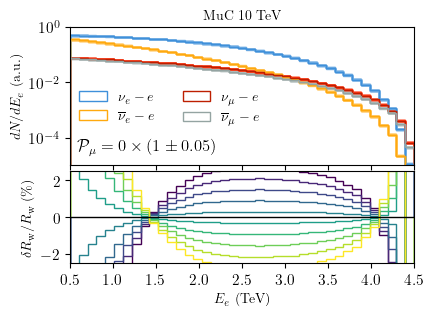

In [40]:
def get_nue_diff_rate(Eebins, Enubins, flux, nuf='numubar', **kwargs):
    denu = np.diff(Enubins)
    enu_c = Enubins[:-1] + denu/2
    e_c = Eebins[:-1] + np.diff(Eebins)/2
    ENU, EE = np.meshgrid(enu_c, e_c)
    y = EE/ENU

    return np.sum(denu * xs.nue_elastic_dsigma_dy(y, Enu=ENU, nuf=nuf, **kwargs) * np.repeat(flux, y.shape[0]).reshape(y.shape), axis=1)

Ldet = 1e2 # 1 m
norm = const.NAvo * Ldet * 2.6 / 2 * (5 * 1e7)
lighten = 0.75

Enubins = ebins_nue
Te_min = 0.5e3
Te_max = 4.5e3
Eebins = np.linspace(Te_min, Te_max, int((Te_max-Te_min)/1e2), endpoint=True)
e_c = Eebins[:-1] + np.diff(Eebins)/2

Pcentral = 0 #0.22
Psigma = 0.05#0.05*Pcentral
Pvalues = np.linspace(Pcentral - Psigma, Pcentral + Psigma, 10)
height_ratios=[3,2]
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=pt.std_figsize, gridspec_kw={'height_ratios': height_ratios})


kwargs = {"det_location": [0,0, 500e2], "ebins": np.linspace(0, sim.design['beam_p0'], 100, endpoint=True), "det_radius": [0, 1000], "per_area": False, "new_polarization": Pcentral}
ebins_nue, flux_nue = sim.mustorage_sims[0].get_flux_at_generic_location(**kwargs)
ebins_numubar, flux_numubar = sim.mustorage_sims[1].get_flux_at_generic_location(**kwargs)
ebins_nuebar, flux_nuebar = sim.mustorage_sims[2].get_flux_at_generic_location(**kwargs)
ebins_numu, flux_numu = sim.mustorage_sims[3].get_flux_at_generic_location(**kwargs)


histkwargs={"density": False, "bins": Eebins/1e3, "histtype": 'step', "lw": 1, 'zorder': 2}
Rmu_central = get_nue_diff_rate(Eebins, Enubins, flux_numu, nuf='numu')*norm
Re_central = get_nue_diff_rate(Eebins, Enubins, flux_nue, nuf='nue')*norm
Rmub_central = get_nue_diff_rate(Eebins, Enubins, flux_numubar, nuf='numubar')*norm
Reb_central = get_nue_diff_rate(Eebins, Enubins, flux_nuebar, nuf='nuebar')*norm
Total = Re_central+Rmub_central+Reb_central+Rmu_central
Ratio_central = ((Re_central+Rmub_central) - (Reb_central+Rmu_central))/(Re_central+Rmub_central+Reb_central+Rmu_central)

_=ax.hist(e_c/1e3, weights=Re_central/Total.max(), color=pt.cblind_safe_wheel[0], label=r'$\nu_e - e$', **histkwargs)
_=ax.hist(e_c/1e3, weights=Reb_central/Total.max(), color=pt.cblind_safe_wheel[1], label=r'$\overline\nu_e - e$', **histkwargs)
_=ax.hist(e_c/1e3, weights=Rmu_central/Total.max(), color=pt.cblind_safe_wheel[2], label=r'$\nu_\mu - e$', **histkwargs)
_=ax.hist(e_c/1e3, weights=Rmub_central/Total.max(), color=pt.cblind_safe_wheel[3], label=r'$\overline\nu_\mu - e$', **histkwargs)
_=ax2.hist(e_c/1e3, weights=Ratio_central*0, color='black', **histkwargs)

histkwargs={"density": False, "bins": Eebins/1e3, "histtype": 'step', "lw": 1, 'zorder': 1}
colors=pt.get_cmap_colors('viridis', len(Pvalues))
for i, p in enumerate(Pvalues):
    kwargs = {"det_location": [0,0, 500e2], "ebins": np.linspace(0, sim.design['beam_p0'], 100, endpoint=True), "det_radius": [0, 1000], "per_area": False, "new_polarization": p}
    ebins_nue, flux_nue = sim.mustorage_sims[0].get_flux_at_generic_location(**kwargs)
    ebins_numubar, flux_numubar = sim.mustorage_sims[1].get_flux_at_generic_location(**kwargs)
    ebins_nuebar, flux_nuebar = sim.mustorage_sims[2].get_flux_at_generic_location(**kwargs)
    ebins_numu, flux_numu = sim.mustorage_sims[3].get_flux_at_generic_location(**kwargs)

    Rmu = get_nue_diff_rate(Eebins, Enubins, flux_numu, nuf='numu')*norm
    Re = get_nue_diff_rate(Eebins, Enubins, flux_nue, nuf='nue')*norm
    Rmub = get_nue_diff_rate(Eebins, Enubins, flux_numubar, nuf='numubar')*norm
    Reb = get_nue_diff_rate(Eebins, Enubins, flux_nuebar, nuf='nuebar')*norm 
    Total = Re+Rmub+Reb+Rmu
    Ratio = ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu)
    
    _=ax.hist(e_c/1e3, weights=Re/Total.max(), color=pt.lighten_color(pt.cblind_safe_wheel[0], lighten), **histkwargs)
    _=ax.hist(e_c/1e3, weights=Reb/Total.max(), color=pt.lighten_color(pt.cblind_safe_wheel[1], lighten), **histkwargs)
    _=ax.hist(e_c/1e3, weights=Rmu/Total.max(), color=pt.lighten_color(pt.cblind_safe_wheel[2], lighten), **histkwargs)
    _=ax.hist(e_c/1e3, weights=Rmub/Total.max(), color=pt.lighten_color(pt.cblind_safe_wheel[3], lighten), **histkwargs)
    _=ax2.hist(e_c/1e3, weights=100*(Ratio - Ratio_central)/Ratio_central, color=colors[i], **histkwargs)

ax.set_yscale('log')
ax.set_ylim(1e-5,1)
ax.set_yticks([1e-4, 1e-2, 1])
ax2.set_ylim(-2.5,2.5)
ax.set_xlim(Te_min/1e3, Te_max/1e3)
ax.set_xticks([0.5, 1, 1.5,2,2.5,3,3.5,4, 4.5])

ax.set_ylabel(r"$dN/dE_e$ (a.u.)", fontsize=10)
ax2.set_ylabel(r"$\delta R_{\rm w}/R_{\rm w}$ (\%)", fontsize=10)
ax2.set_xlabel(r"$E_e$ (TeV)", fontsize=10)
ax.legend(ncol=2, loc=(0.01,0.25))
ax.set_title(r"MuC 10 TeV", fontsize=10)
ax.annotate(rf'$\mathcal{{P}}_\mu = {Pcentral} \times (1\pm{Psigma:.2f})$', xy=(0.02, 0.1), xycoords='axes fraction', fontsize=12)
plt.subplots_adjust(hspace=0.05)
# fig.savefig(f'plots/paper_plots/polarization_constraint_{Pcentral}.pdf', bbox_inches = 'tight', dpi = 500)

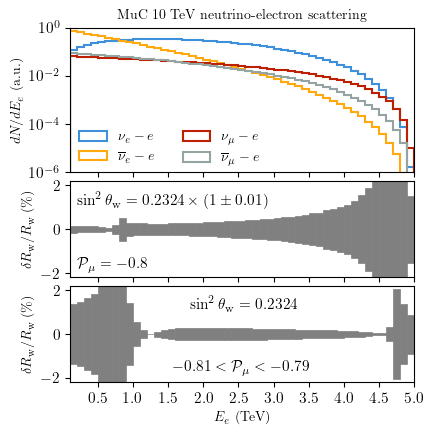

In [83]:

Ldet = 1e2 # 1 m
norm = const.NAvo * Ldet * 2.6 / 2 * (5 * 1e7)
lighten = 0.75

Enubins = ebins_nue
Te_min = 100
Te_max = 5e3
Eebins = np.linspace(Te_min, Te_max, 50, endpoint=True)
e_c = Eebins[:-1] + np.diff(Eebins)/2
s2w_central = 0.2324
s2w_1sigma = 0.0083
s2w_1sigma = 1e-2*0.2324

Pcentral = -0.8#0.22
Psigma = 0.01#0.05*Pcentral


fig, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=[pt.std_figsize[0],pt.std_figsize[1]*1.5], gridspec_kw={'height_ratios': [3,2,2]})

##################################################################
# Weak mixing angle variation 

kwargs = {"det_location": [0,0, 500e2], "ebins": np.linspace(0, sim.design['beam_p0'], 100, endpoint=True), "det_radius": [0, 1000], "per_area": False, "new_polarization": Pcentral}
ebins_nue, flux_nue = sim.mustorage_sims[0].get_flux_at_generic_location(**kwargs)
ebins_numubar, flux_numubar = sim.mustorage_sims[1].get_flux_at_generic_location(**kwargs)
ebins_nuebar, flux_nuebar = sim.mustorage_sims[2].get_flux_at_generic_location(**kwargs)
ebins_numu, flux_numu = sim.mustorage_sims[3].get_flux_at_generic_location(**kwargs)


kwargs = {"s2w": s2w_central}
histkwargs={"density": False, "bins": Eebins/1e3, "histtype": 'step', "lw": 1.5, 'zorder': 2}
Rmu_central = get_nue_diff_rate(Eebins, Enubins, flux_numu, nuf='numu', **kwargs)*norm
Re_central = get_nue_diff_rate(Eebins, Enubins, flux_nue, nuf='nue', **kwargs)*norm
Rmub_central = get_nue_diff_rate(Eebins, Enubins, flux_numubar, nuf='numubar', **kwargs)*norm
Reb_central = get_nue_diff_rate(Eebins, Enubins, flux_nuebar, nuf='nuebar', **kwargs)*norm
Total = Re_central+Rmub_central+Reb_central+Rmu_central
Ratio_central = ((Re_central+Rmub_central) - (Reb_central+Rmu_central))/(Re_central+Rmub_central+Reb_central+Rmu_central)#/2/s2w_central*(1+8*s2w_central**2)

_=ax.hist(e_c/1e3, weights=Re_central/Total.max(), color=pt.cblind_safe_wheel[0], label=r'$\nu_e-e$', **histkwargs)
_=ax.hist(e_c/1e3, weights=Reb_central/Total.max(), color=pt.cblind_safe_wheel[1], label=r'$\overline\nu_e-e$', **histkwargs)
_=ax.hist(e_c/1e3, weights=Rmu_central/Total.max(), color=pt.cblind_safe_wheel[2], label=r'$\nu_\mu-e$', **histkwargs)
_=ax.hist(e_c/1e3, weights=Rmub_central/Total.max(), color=pt.cblind_safe_wheel[3], label=r'$\overline\nu_\mu-e$', **histkwargs)
# _=ax2.hist(e_c/1e3, weights=Ratio_central*0, color='black', **histkwargs)

histkwargs={"density": False, "bins": Eebins/1e3, "histtype": 'step', "lw": 1, 'zorder': 1}

kwargs = {"s2w": s2w_central+s2w_1sigma}
Rmu = get_nue_diff_rate(Eebins, Enubins, flux_numu, nuf='numu', **kwargs)*norm
Re = get_nue_diff_rate(Eebins, Enubins, flux_nue, nuf='nue', **kwargs)*norm
Rmub = get_nue_diff_rate(Eebins, Enubins, flux_numubar, nuf='numubar', **kwargs)*norm
Reb = get_nue_diff_rate(Eebins, Enubins, flux_nuebar, nuf='nuebar', **kwargs)*norm
Total = Re+Rmub+Reb+Rmu
Ratio_high = ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu)#/2/s2w*(1+8*s2w**2)

kwargs = {"s2w": s2w_central-s2w_1sigma}
Rmu = get_nue_diff_rate(Eebins, Enubins, flux_numu, nuf='numu', **kwargs)*norm
Re = get_nue_diff_rate(Eebins, Enubins, flux_nue, nuf='nue', **kwargs)*norm
Rmub = get_nue_diff_rate(Eebins, Enubins, flux_numubar, nuf='numubar', **kwargs)*norm
Reb = get_nue_diff_rate(Eebins, Enubins, flux_nuebar, nuf='nuebar', **kwargs)*norm
Total = Re+Rmub+Reb+Rmu
Ratio_low = ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu)

# _=ax2.fill_between(e_c/1e3, 100*(Ratio_low - Ratio_central)/Ratio_central, 100*(Ratio_high - Ratio_central)/Ratio_central, color='grey', edgecolor='black', lw=0.25)
_=ax2.bar(e_c/1e3, bottom=100*(Ratio_low - Ratio_central)/Ratio_central, height=100*(Ratio_high - Ratio_low)/Ratio_central, width=np.diff(Eebins/1e3), color='grey', edgecolor='grey', lw=0.5)

##################################################################
# Polarization

# Case 1 (No polarization)
kwargs = {"det_location": [0,0, 500e2], "ebins": np.linspace(0, sim.design['beam_p0'], 100, endpoint=True), "det_radius": [0, 1000], "per_area": False, "new_polarization": Pcentral}
ebins_nue, flux_nue = sim.mustorage_sims[0].get_flux_at_generic_location(**kwargs)
ebins_numubar, flux_numubar = sim.mustorage_sims[1].get_flux_at_generic_location(**kwargs)
ebins_nuebar, flux_nuebar = sim.mustorage_sims[2].get_flux_at_generic_location(**kwargs)
ebins_numu, flux_numu = sim.mustorage_sims[3].get_flux_at_generic_location(**kwargs)

Rmu = get_nue_diff_rate(Eebins, Enubins, flux_numu, nuf='numu')*norm
Re = get_nue_diff_rate(Eebins, Enubins, flux_nue, nuf='nue')*norm
Rmub = get_nue_diff_rate(Eebins, Enubins, flux_numubar, nuf='numubar')*norm
Reb = get_nue_diff_rate(Eebins, Enubins, flux_nuebar, nuf='nuebar')*norm 
Ratio_central = ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu)

# Case 2
kwargs = {"det_location": [0,0, 500e2], "ebins": np.linspace(0, sim.design['beam_p0'], 100, endpoint=True), "det_radius": [0, 1000], "per_area": False, "new_polarization": Pcentral - Psigma}
ebins_nue, flux_nue = sim.mustorage_sims[0].get_flux_at_generic_location(**kwargs)
ebins_numubar, flux_numubar = sim.mustorage_sims[1].get_flux_at_generic_location(**kwargs)
ebins_nuebar, flux_nuebar = sim.mustorage_sims[2].get_flux_at_generic_location(**kwargs)
ebins_numu, flux_numu = sim.mustorage_sims[3].get_flux_at_generic_location(**kwargs)

Rmu = get_nue_diff_rate(Eebins, Enubins, flux_numu, nuf='numu')*norm
Re = get_nue_diff_rate(Eebins, Enubins, flux_nue, nuf='nue')*norm
Rmub = get_nue_diff_rate(Eebins, Enubins, flux_numubar, nuf='numubar')*norm
Reb = get_nue_diff_rate(Eebins, Enubins, flux_nuebar, nuf='nuebar')*norm 
Ratio_low = ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu)


# Case 3
kwargs = {"det_location": [0,0, 500e2], "ebins": np.linspace(0, sim.design['beam_p0'], 100, endpoint=True), "det_radius": [0, 1000], "per_area": False, "new_polarization": Pcentral + Psigma}
ebins_nue, flux_nue = sim.mustorage_sims[0].get_flux_at_generic_location(**kwargs)
ebins_numubar, flux_numubar = sim.mustorage_sims[1].get_flux_at_generic_location(**kwargs)
ebins_nuebar, flux_nuebar = sim.mustorage_sims[2].get_flux_at_generic_location(**kwargs)
ebins_numu, flux_numu = sim.mustorage_sims[3].get_flux_at_generic_location(**kwargs)

Rmu = get_nue_diff_rate(Eebins, Enubins, flux_numu, nuf='numu')*norm
Re = get_nue_diff_rate(Eebins, Enubins, flux_nue, nuf='nue')*norm
Rmub = get_nue_diff_rate(Eebins, Enubins, flux_numubar, nuf='numubar')*norm
Reb = get_nue_diff_rate(Eebins, Enubins, flux_nuebar, nuf='nuebar')*norm 
Ratio_high = ((Re+Rmub) - (Reb+Rmu))/(Re+Rmub+Reb+Rmu)

# _=ax3.fill_between(e_c/1e3, 100*(Ratio_low - Ratio_central)/Ratio_central, 100*(Ratio_high - Ratio_central)/Ratio_central, color='grey', edgecolor='black', lw=0.25)
_=ax3.bar(e_c/1e3, bottom=100*(Ratio_low - Ratio_central)/Ratio_central, height=100*(Ratio_high - Ratio_low)/Ratio_central, width=np.diff(Eebins/1e3), color='grey', edgecolor='grey', lw=0.5)
# _=ax3.fill_between(Eebins[:-1]/1e3, 100*(Ratio_high - Ratio_central)/Ratio_central, 100*(Ratio_low - Ratio_central)/Ratio_central, color='grey', edgecolor='black', lw=0.25)


ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_yticks([1e-6, 1e-4, 1e-2, 1])
ax2.set_ylim(-2.2,2.2)
ax3.set_ylim(-2.2,2.2)

ax.set_xlim(Te_min/1e3, Te_max/1e3)
ax.set_xticks([0.5, 1, 1.5,2,2.5,3,3.5,4, 4.5, 5.0])
ax.legend(ncol=2, loc=(0.01,0.01))
ax.set_title(r"MuC 10 TeV neutrino-electron scattering", fontsize=10)

ax.set_ylabel(r"$dN/dE_e$ (a.u.)", fontsize=10)
ax3.set_xlabel(r"$E_e$ (TeV)", fontsize=10)
ax2.set_ylabel(r"$\delta R_{\rm w}/R_{\rm w}$ (\%)", fontsize=10)
ax3.set_ylabel(r"$\delta R_{\rm w}/R_{\rm w}$ (\%)", fontsize=10)

ax2.annotate(rf'$\sin^2\theta_{{\rm w}} = {s2w_central} \times(1 \pm {s2w_1sigma/s2w_central:.2f})$', xy=(0.02, 0.75), xycoords='axes fraction', fontsize=11)
# ax2.annotate(rf'$\sin^2\theta_{{\rm w}} = {s2w_central} \pm {s2w_1sigma}$', xy=(0.02, 0.75), xycoords='axes fraction', fontsize=11)
ax2.annotate(rf'$\mathcal{{P}}_\mu = {Pcentral}$', xy=(0.02, 0.08), xycoords='axes fraction', fontsize=11)
ax3.annotate(rf'$\sin^2\theta_{{\rm w}} = {s2w_central}$', xy=(0.35, 0.75), xycoords='axes fraction', fontsize=11)
ax3.annotate(rf'${Pcentral-Psigma:.2f}<\mathcal{{P}}_\mu<{Pcentral+Psigma:.2f}$', xy=(0.3, 0.1), xycoords='axes fraction', fontsize=11)

plt.subplots_adjust(hspace=0.075)
fig.savefig(f'plots/paper_plots/ES_s2w_constraint_{s2w_central}_and_Pmu_{Pcentral}.pdf', bbox_inches = 'tight', dpi = 500)